In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [110]:
data = pd.read_csv("C:/Users/Simplon/Desktop/projet_food/data2.csv",error_bad_lines= False,delimiter='\t',encoding='utf-8')


C:\Users\Simplon\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,8,13,22,23,27,28,29,31,52,64) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.shape

(1984004, 186)

In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984004 entries, 0 to 1984003
Columns: 186 entries, code to carnitine_100g
dtypes: float64(124), int64(2), object(60)
memory usage: 2.7+ GB


In [235]:
data["countries_en"].value_counts().head()

France           770273
United States    378870
Spain            218513
Italy            107694
Germany           74417
Name: countries_en, dtype: int64

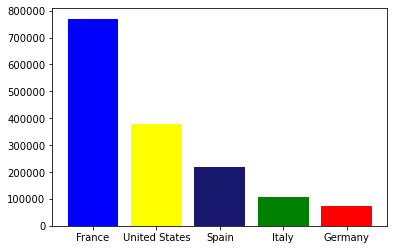

In [237]:
col=['blue','yellow','midnightblue','green','red']
# Categorical data: Country names
countries = ['France', 'United States', 'Spain', 'Italy', 'Germany']
# Integer value interms of death counts
totalproduits = [770273,378870, 218513,107694,74417]
# Passing the parameters to the bar function, this is the main function which creates the bar plot
plt.bar(countries, totalproduits,color=col)
# Displaying the bar plot
plt.show()

In [238]:
data['nutriscore_grade'].value_counts()

d    223346
c    154445
e    131962
a    114653
b     93524
Name: nutriscore_grade, dtype: int64

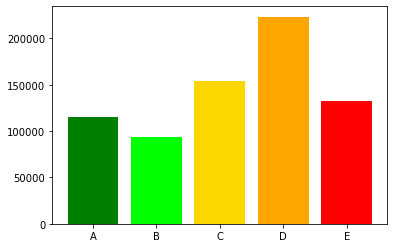

In [239]:
col=['green','lime','gold','orange','red']
# Categorical data: Country names
score = ['A', 'B', 'C', 'D', 'E']
# Integer value interms of death counts
totalscore = [114653,93524, 154445,223346,131962]
# Passing the parameters to the bar function, this is the main function which creates the bar plot
plt.bar(score, totalscore,color=col)
# Displaying the bar plot
plt.show()

In [9]:
data = data[data.columns[data.isna().sum()/data.shape[0] <0.9]]

NumExpr defaulting to 4 threads.


In [ ]:
data.shape

# Choix de colonnes pour notre application

In [10]:
g100 = [_ for _ in data.columns if '100g' in _]
g100

['energy-kcal_100g',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'nutrition-score-fr_100g']

In [202]:
df_100g=data[['energy-kcal_100g',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'nutrition-score-fr_100g']]
df_100g.head()



,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.4,0.90,NaN,NaN,9.8,9.8,NaN,2.7,0.1,0.04,NaN,NaN,NaN,NaN,NaN
2,375.0,1569.0,7.0,3.08,NaN,NaN,70.1,15.0,NaN,7.8,1.4,0.56,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,163.9,685.8,1.9,1.00,NaN,NaN,NaN,NaN,NaN,15.3,1.1,0.44,NaN,NaN,NaN,NaN,NaN


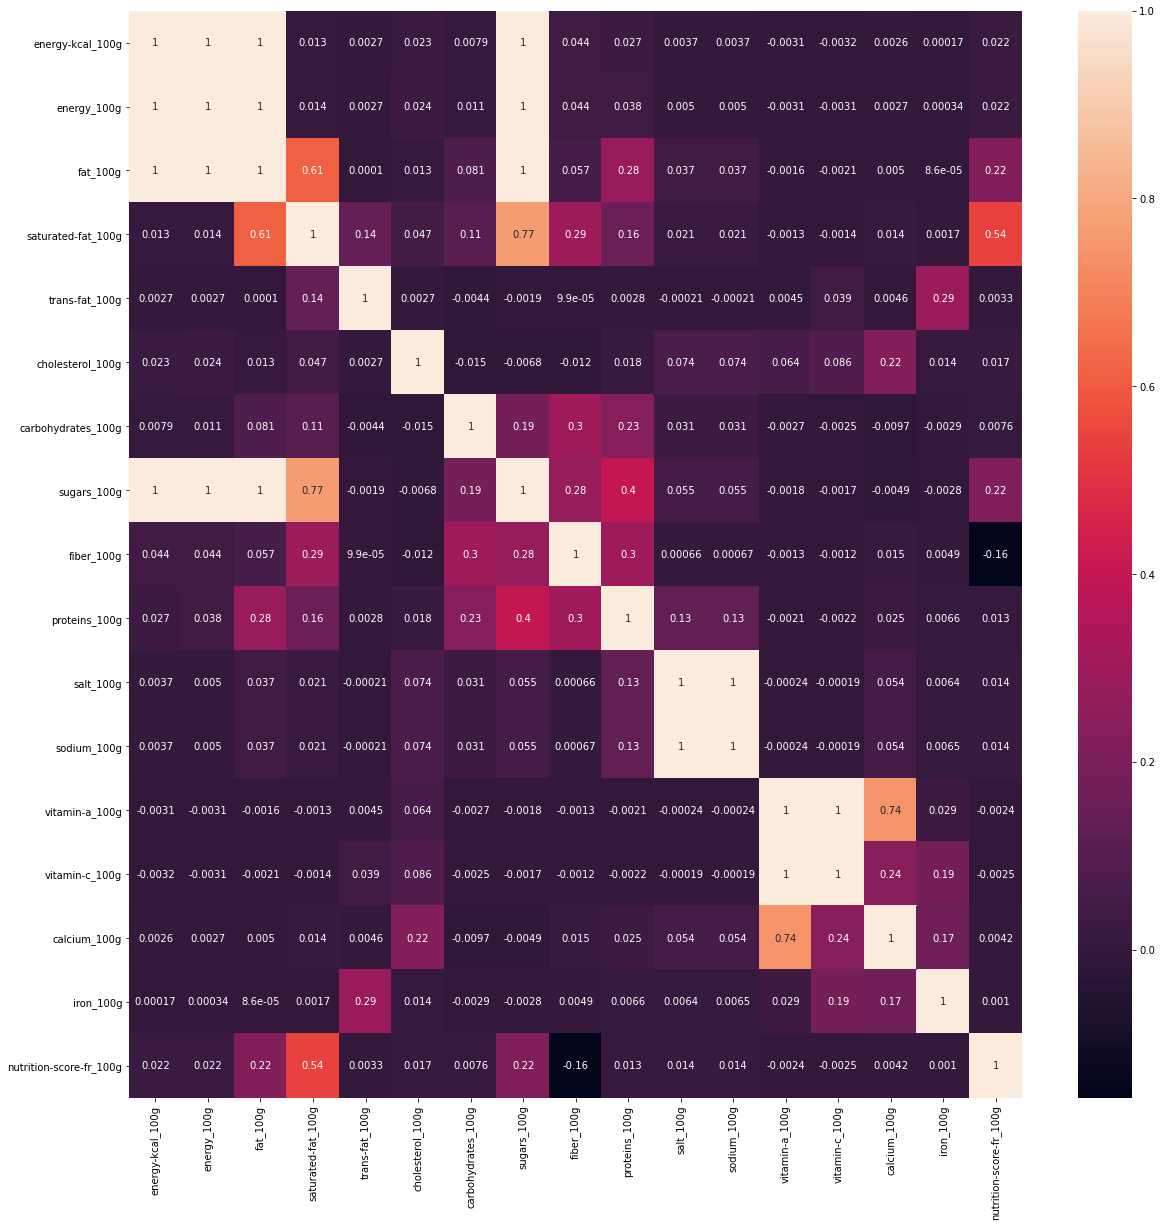

In [34]:
corr_df_100g = df_100g.corr(method='pearson')

plt.figure(figsize=(20, 20))
sns.heatmap(corr_df_100g, annot=True)
plt.show()

In [203]:
df_nan = pd.DataFrame({'Nan':df_100g.isna().sum()})
df_nan['%nan'] = df_nan['Nan']/df_100g.shape[0]*100
round(df_nan,2).sort_values(by='%nan' , ascending=False)

,Nan,%nan
vitamin-a_100g,1771299,89.28
vitamin-c_100g,1763558,88.89
trans-fat_100g,1719036,86.64
iron_100g,1718786,86.63
cholesterol_100g,1715017,86.44
calcium_100g,1713098,86.35
fiber_100g,1492652,75.23
nutrition-score-fr_100g,1266068,63.81
salt_100g,499858,25.19
sodium_100g,499861,25.19


In [204]:
columns = ['sodium_100g','energy_100g','fiber_100g','nutrition-score-fr_100g','cholesterol_100g','vitamin-c_100g','vitamin-a_100g','trans-fat_100g','iron_100g','calcium_100g']
df_100g=df_100g.drop(columns, axis=1)


energy-kcal_100g          AxesSubplot(0.125,0.71587;0.168478x0.16413)
fat_100g               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
saturated-fat_100g     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
carbohydrates_100g     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
sugars_100g              AxesSubplot(0.125,0.518913;0.168478x0.16413)
proteins_100g         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
salt_100g             AxesSubplot(0.529348,0.518913;0.168478x0.16413)
dtype: object

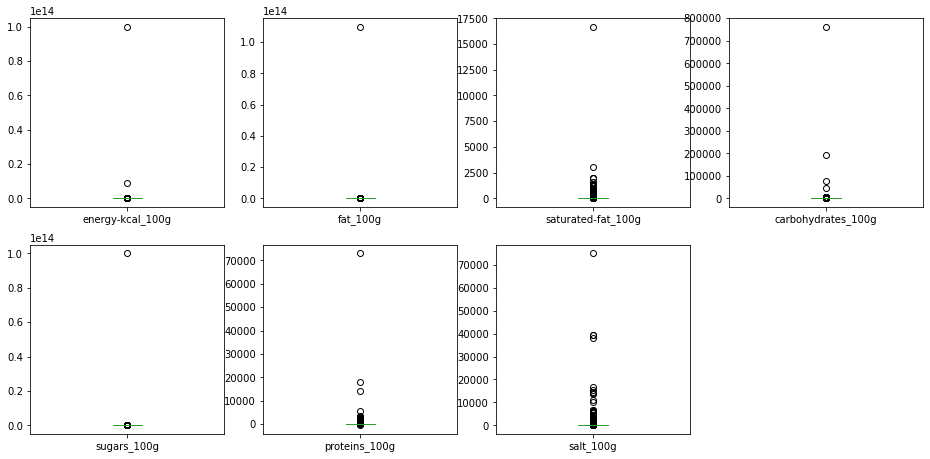

In [210]:
df_100g.plot(kind='box', subplots=True, layout=(4,4), figsize = (16, 16))

In [58]:
df_100g.head()

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.4,0.90,9.8,9.8,2.7,0.1
2,375.0,7.0,3.08,70.1,15.0,7.8,1.4
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,163.9,1.9,1.00,NaN,NaN,15.3,1.1


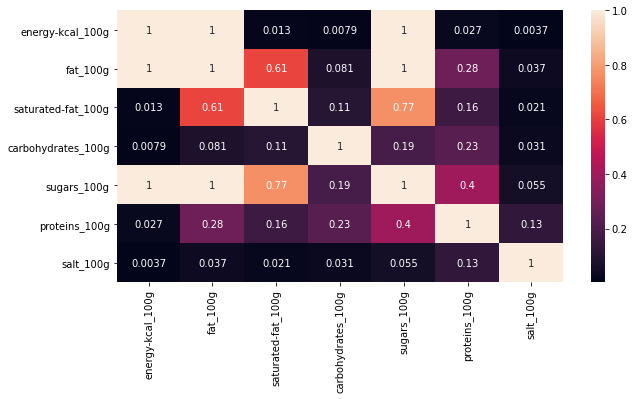

In [15]:
df2 = df_100g.corr(method='pearson')

plt.figure(figsize=(10, 5))
sns.heatmap(df2,annot=True)
plt.show()

In [195]:
#outliers
Q1 = df_100g.quantile(0.25)
Q3 = df_100g.quantile(0.75)
IQR = Q3 - Q1
A=((df_100g[df_100g.columns ]< (Q1 - 1.5 * IQR)) | (df_100g[df_100g.columns] > (Q3 + 1.5 * IQR))).sum()

<ipython-input-195-a7663d3fe795>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  A=((df_100g[df_100g.columns ]< (Q1 - 1.5 * IQR)) | (df_100g[df_100g.columns] > (Q3 + 1.5 * IQR))).sum()
<ipython-input-195-a7663d3fe795>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  A=((df_100g[df_100g.columns ]< (Q1 - 1.5 * IQR)) | (df_100g[df_100g.columns] > (Q3 + 1.5 * IQR))).sum()


In [196]:
A

carbohydrates_100g       37
energy-kcal_100g       7916
fat_100g              23454
nutriscore_grade          0
proteins_100g         17859
salt_100g             34473
saturated-fat_100g    41586
sugars_100g           62400
dtype: int64

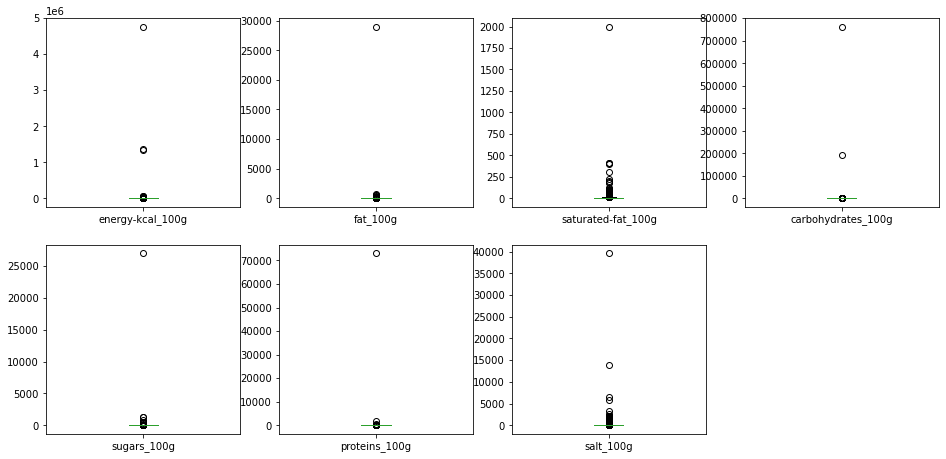

In [197]:
df_100g.plot(kind='box', subplots=True, layout=(4, 4), figsize = (16, 16));

<AxesSubplot:>

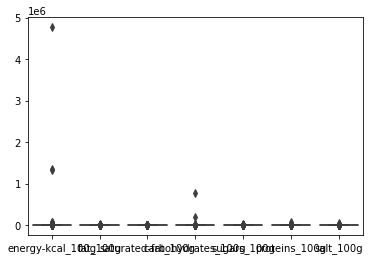

In [198]:
sns.boxplot( data = df_100g )

In [46]:
df_100g.isnull().sum()

energy-kcal_100g      461258
fat_100g              417783
saturated-fat_100g    460813
carbohydrates_100g    418137
sugars_100g           433760
proteins_100g         416563
salt_100g             499858
dtype: int64

In [104]:
df_100g['nutriscore_grade']=data['nutriscore_grade']
df_100g.head()


,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,nutriscore_grade
17,32.0,0.3,0.1,5.3,3.9,0.9,0.42,b
26,381.0,22.0,15.5,27.3,21.9,4.6,0.10,d
36,157.0,0.0,0.0,36.0,27.0,0.6,0.00,a
40,143.0,12.7,1.0,3.9,1.0,1.9,0.27,b
66,397.0,33.0,21.6,0.1,0.1,25.0,1.30,d


In [105]:
df2=df_100g.copy()

In [69]:
df_100g=df_100g.dropna()
df_100g.shape

(676545, 8)

In [71]:
X=df_100g.drop('nutriscore_grade',axis=1)
y=df_100g['nutriscore_grade']

(676545, 8)

In [72]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)


(1355292, 7)

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=1)

In [82]:
rs=RobustScaler()
X_train=rs.fit_transform(X_train)
X_train=rs.transform(X_test)

In [87]:
print(y_train.shape)
print(X_train.shape)

(541236,)
(541236, 7)


In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [96]:
#training score
knn.score(X_train, y_train)

0.8317074252267034

In [95]:
#test score
knn.score(X_test, y_test)

0.759905106090504

In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, ypred)

0.759905106090504

In [92]:
ypred = knn.predict(X_test)
cm = confusion_matrix(y_test, ypred)

In [93]:
cm

array([[16763,  2676,  1215,   303,   158],
       [ 3011, 10845,  2965,   564,   171],
       [ 1633,  2950, 19810,  4214,   430],
       [  530,   681,  4236, 34819,  2431],
       [  361,   266,   806,  2886, 20585]], dtype=int64)

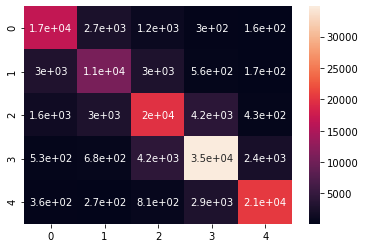

In [100]:
cm = confusion_matrix(y_test, ypred)
sns.heatmap(cm, annot=True)
plt.show()

In [160]:
df_t = data[['code','created_datetime', 'product_name', 'nutriscore_grade', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g' ,'fiber_100g', 'additives_n', 'additives', 'additives_tags', 'sugars_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'nova_group', 'pnns_groups_2']]


In [161]:
height=df_t['nutriscore_grade'].value_counts()
height

d    223346
c    154445
e    131962
a    114653
b     93524
Name: nutriscore_grade, dtype: int64

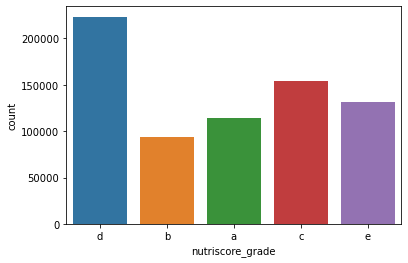

In [194]:
col=['blue','green','lime','gold','orange','red']
sns.countplot(data=df_t, x="nutriscore_grade")
plt.show()

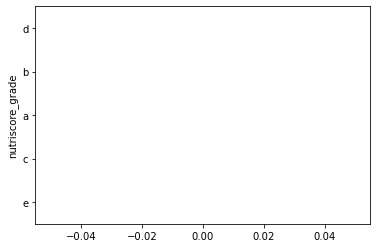

In [174]:
sns.barplot(
    x=df_t.value_counts("nutriscore_grade"), 
    y="nutriscore_grade", 
    data=df_t, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

In [14]:
df.shape

(1984004, 15)

In [21]:
df.isnull().sum()

code                             0
product_name                 81333
nutriscore_grade           1266074
nutrition-score-fr_100g    1266068
nutrition-score-uk_100g    1983996
fiber_100g                 1492652
additives_n                1262133
additives                  1984004
additives_tags             1567706
sugars_100g                 433760
fat_100g                    417783
saturated-fat_100g          460813
carbohydrates_100g          418137
nova_group                 1353894
pnns_groups_2                  130
dtype: int64

array([[<AxesSubplot:title={'center':'nutrition-score-fr_100g'}>,
        <AxesSubplot:title={'center':'nutrition-score-uk_100g'}>,
        <AxesSubplot:title={'center':'fiber_100g'}>],
       [<AxesSubplot:title={'center':'additives_n'}>,
        <AxesSubplot:title={'center':'additives'}>,
        <AxesSubplot:title={'center':'sugars_100g'}>],
       [<AxesSubplot:title={'center':'fat_100g'}>,
        <AxesSubplot:title={'center':'saturated-fat_100g'}>,
        <AxesSubplot:title={'center':'carbohydrates_100g'}>],
       [<AxesSubplot:title={'center':'nova_group'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

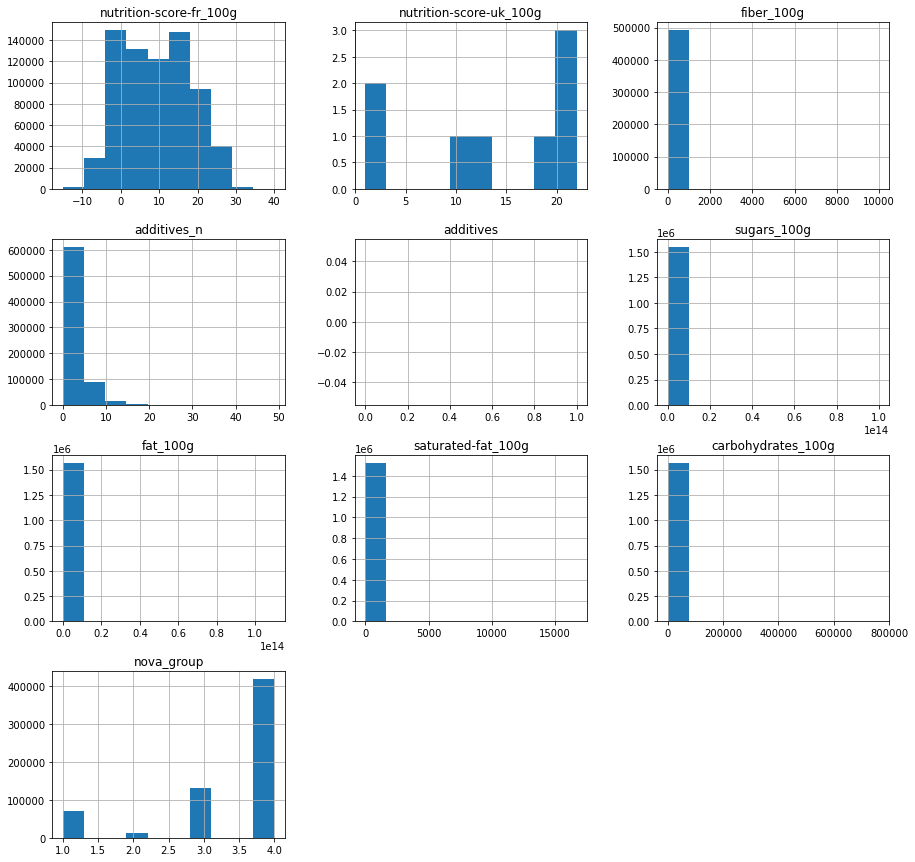

In [15]:
df.hist(figsize=(15,15))

In [24]:
df = df.drop_duplicates()

In [25]:
#outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df[df.columns ]< (Q1 - 1.5 * IQR)) | (df[df.columns] > (Q3 + 1.5 * IQR))).sum()

<ipython-input-25-e615e8ce628e>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df[df.columns ]< (Q1 - 1.5 * IQR)) | (df[df.columns] > (Q3 + 1.5 * IQR))).sum()
<ipython-input-25-e615e8ce628e>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df[df.columns ]< (Q1 - 1.5 * IQR)) | (df[df.columns] > (Q3 + 1.5 * IQR))).sum()


additives                       0
additives_n                 40831
additives_tags                  0
carbohydrates_100g            226
code                            0
fat_100g                    57077
fiber_100g                  36865
nova_group                  69681
nutriscore_grade                0
nutrition-score-fr_100g        12
nutrition-score-uk_100g         0
pnns_groups_2                   0
product_name                    0
saturated-fat_100g         116215
sugars_100g                157636
dtype: int64

In [ ]:
df.product_name.value_counts().head(10)